<a href="https://colab.research.google.com/github/mwithgod3952/Machine_Learning_Theory_jh/blob/master/interpolate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import griddata

import warnings
warnings.filterwarnings("ignore")

In [94]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [95]:
X, Y = np.mgrid[0:1:100j, 0:1:200j]

In [96]:
Z = [func(ar[0], ar[1]) for ar in zip(X,Y)]

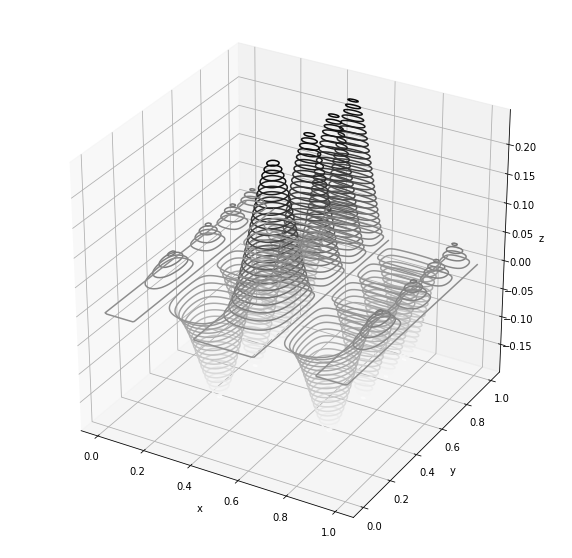

In [84]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

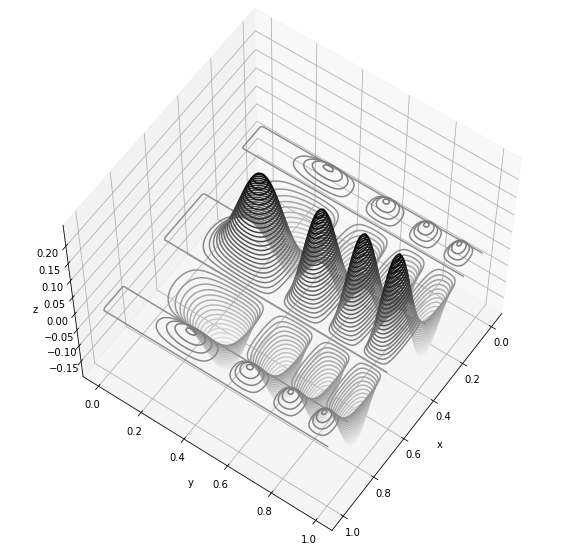

In [85]:
ax.view_init(60, 35)
fig

In [86]:
rng = np.random.default_rng()
points = rng.random((1000, 2))
values = func(points[:,0], points[:,1])

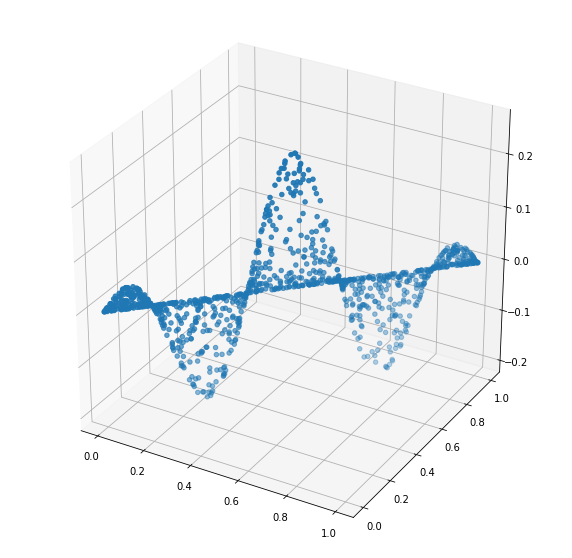

In [104]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(points[:,0], points[:,0], func(points[:,0], points[:,1]))
plt.show()

In [108]:
grid_z0 = griddata(points, values, (X, Y), method='nearest')
grid_z1 = griddata(points, values, (X, Y), method='linear')
grid_z2 = griddata(points, values, (X, Y), method='cubic')

In [116]:
z_lst = [grid_z0, grid_z1, grid_z2]

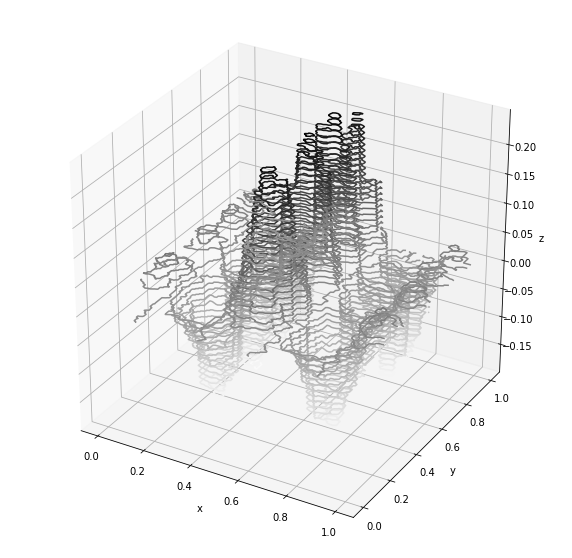

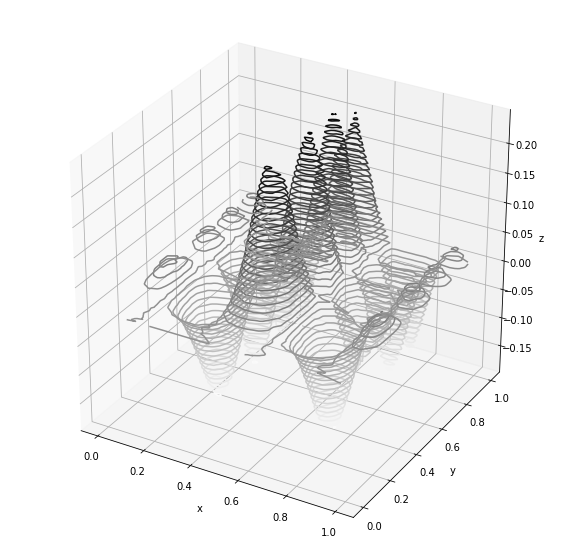

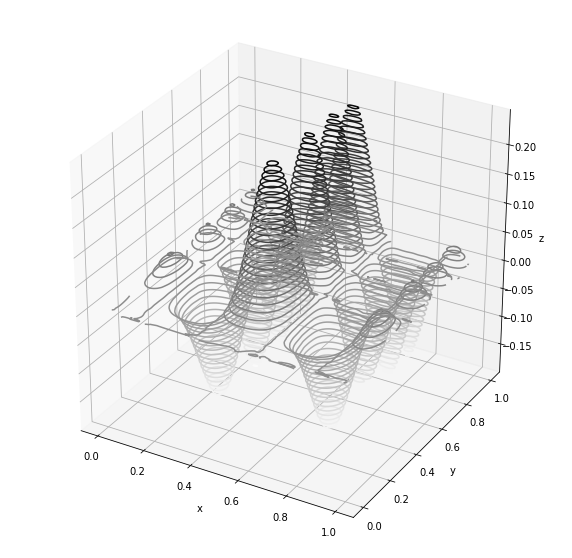

In [132]:
for i in range(3):
    fig = plt.figure(figsize=(10, 10))

    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, z_lst[i], 50, cmap='binary')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()    

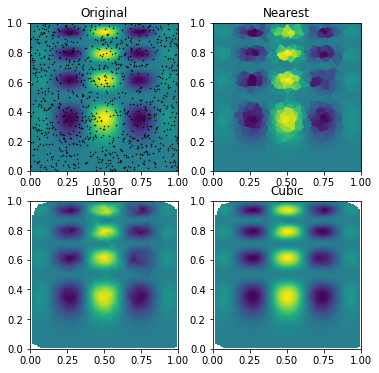

In [110]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(func(X, Y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()